## Initial exploration of the data from Instacart Market Basket.  ##

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

# Read in files
aisles = pd.read_csv('aisles.csv')
departments =  pd.read_csv('departments.csv')
order_products_prior =  pd.read_csv('order_products__prior.csv')
order_products_train =  pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')

### When do people order?
Taking a look at when people order.

In [2]:
# Filter for only Prior data in the orders
orders_prior = orders.loc[orders['eval_set'] == 'prior']

### What day do they order?
People tend to order on the most on days 0 and 1. 

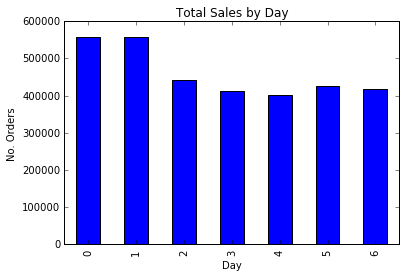

In [3]:
# Plot the days that people most likely order
orders_day = orders_prior.groupby(['order_dow']).size()
orders_by_day = orders_day.plot(kind='bar',title="Total Sales by Day")
orders_by_day.set_xlabel("Day")
orders_by_day.set_ylabel("No. Orders")

### What time of day do they order?
Order seem to be the most frequent between 9 am - 5 pm (regular business hours)

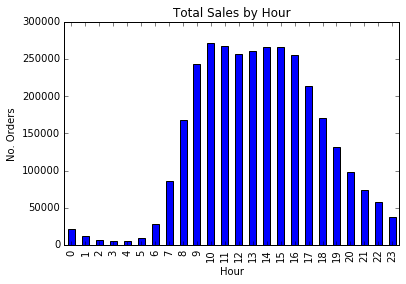

In [4]:
# Plot the hours people most likley order
orders_hour = orders_prior.groupby(['order_hour_of_day']).size()
orders_by_hour = orders_hour.plot(kind='bar',title="Total Sales by Hour")
orders_by_hour.set_xlabel("Hour")
orders_by_hour.set_ylabel("No. Orders")

### How much time do people wait between orders?
Most frequently reordered at 7 days and again at 30 days. Most reorders happened within a week.

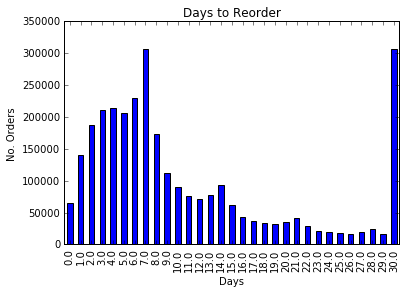

In [5]:
# Plot time to reorder
orders_reorder = orders_prior.groupby(['days_since_prior_order']).size()
orders_by_reorder = orders_reorder.plot(kind='bar',title="Days to Reorder")
orders_by_reorder.set_xlabel("Days")
orders_by_reorder.set_ylabel("No. Orders")

### How much many products do people order?
Most people order about 10 products.

In [ ]:
# Get the distibution number of products that are ordered
products_order = order_products_prior.groupby(["order_id"]).size()
products_by_order = sns.violinplot(x=products_order,scale="width")
print products_order.mean()

### What are the most frequently reordered items?
Fruits and vegtables seem to be the most reordered items

In [ ]:
# Merge orders and products 
orders_prior_by_products = order_products_prior.merge(orders_prior)
orders_grouped_product = orders_prior_by_products.groupby(["product_id"])["reordered"].aggregate({'Re-orders': 'count'}).reset_index()
orders_grouped_products = orders_grouped_product.merge(products).sort_values(by=['Re-orders'], ascending=False)
orders_grouped_products.head(20)